<a href="https://colab.research.google.com/github/sainathnallagonda/social_media_vs_productivity/blob/main/Social_Media_Impact_on_Workplace_Productivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analyzing the Impact of Social Media Usage on Workplace Productivity**

**Context & Objective:**
In today's hyperconnected world, social media has become an integral part of daily life—but its effect on productivity, especially in professional environments, remains a topic of debate. This project explores how variables like daily social media time, platform preferences, notifications, stress levels, and sleep hours influence both perceived and actual productivity.

Using a synthetic dataset of 30,000 individuals across various job roles, this analysis aims to uncover patterns, correlations, and behavioral insights that can inform better digital wellbeing practices and productivity strategies. The study also provides actionable recommendations based on the observed trends, making it relevant for individuals, employers, and digital wellness advocates alike.

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/social_media_vs_productivity.csv')

In [ ]:
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [ ]:
df.shape

(30000, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
job_type,0
daily_social_media_time,2765
social_platform_preference,0
number_of_notifications,0
work_hours_per_day,0
perceived_productivity_score,1614
actual_productivity_score,2365
stress_level,1904


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30000.0,41.486867,13.835221,18.000000,30.000000,41.000000,53.000000,65.000000
daily_social_media_time,27235.0,3.113418,2.074813,0.000000,1.639566,3.025913,4.368917,17.973256
number_of_notifications,30000.0,59.958767,7.723772,30.000000,55.000000,60.000000,65.000000,90.000000
work_hours_per_day,30000.0,6.990792,1.997736,0.000000,5.643771,6.990641,8.354725,12.000000
perceived_productivity_score,28386.0,5.510488,2.023470,2.000252,3.757861,5.525005,7.265776,8.999376
actual_productivity_score,27635.0,4.951805,1.883378,0.296812,3.373284,4.951742,6.526342,9.846258
stress_level,28096.0,5.514059,2.866344,1.000000,3.000000,6.000000,8.000000,10.000000
sleep_hours,27402.0,6.500247,1.464004,3.000000,5.493536,6.498340,7.504143,10.000000
screen_time_before_sleep,27789.0,1.025568,0.653355,0.000000,0.528490,1.006159,1.477221,3.000000
breaks_during_work,30000.0,4.992200,3.173737,0.000000,2.000000,5.000000,8.000000,10.000000


Handling missing values


In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
job_type,0
daily_social_media_time,0
social_platform_preference,0
number_of_notifications,0
work_hours_per_day,0
perceived_productivity_score,0
actual_productivity_score,0
stress_level,0


Outlier treatment using  winsorization

In [ ]:
from scipy.stats.mstats import winsorize

cols_to_winsorize = ['stress_level', 'sleep_hours', 'actual_productivity_score', 'perceived_productivity_score']
for col in cols_to_winsorize:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])  # Capping extreme 5% values

**Data Visualazation**

In [ ]:
plt.style.use('seaborn-v0_8-pastel')
sns.set_context("notebook", font_scale=1.2)
sns.set_palette("Set2")

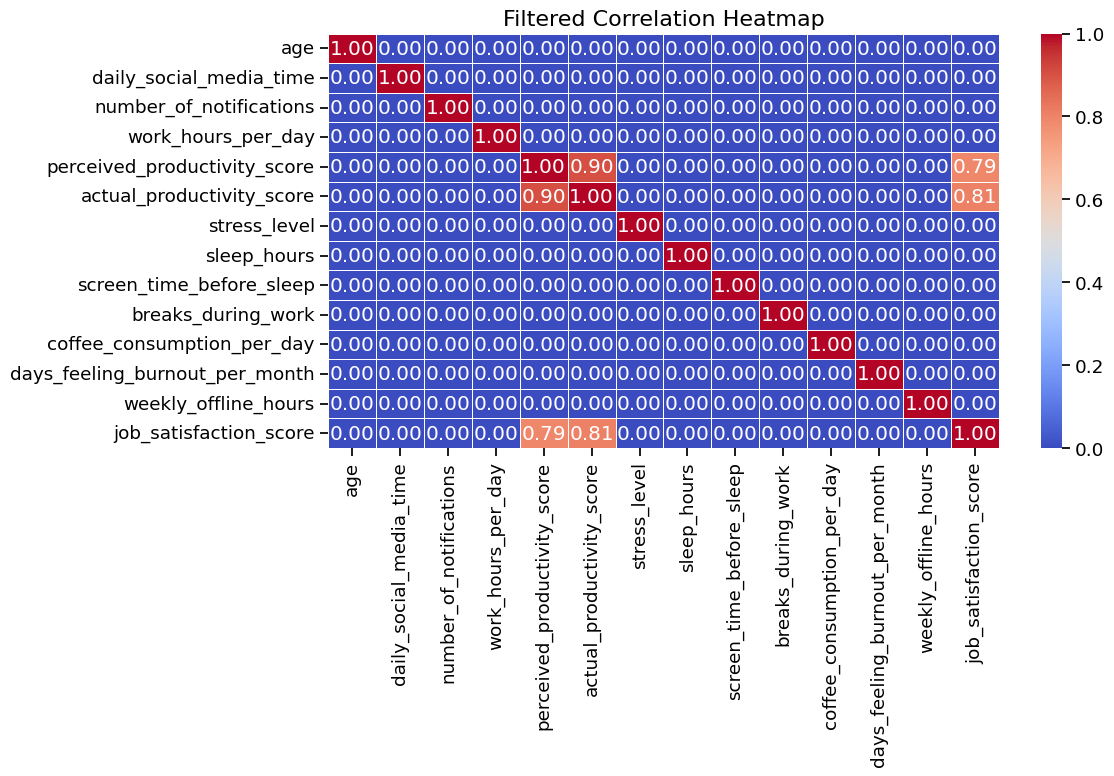

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()

# Filter correlations above a threshold
filtered_corr = corr_matrix[abs(corr_matrix) > 0.2].fillna(0)

sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Filtered Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

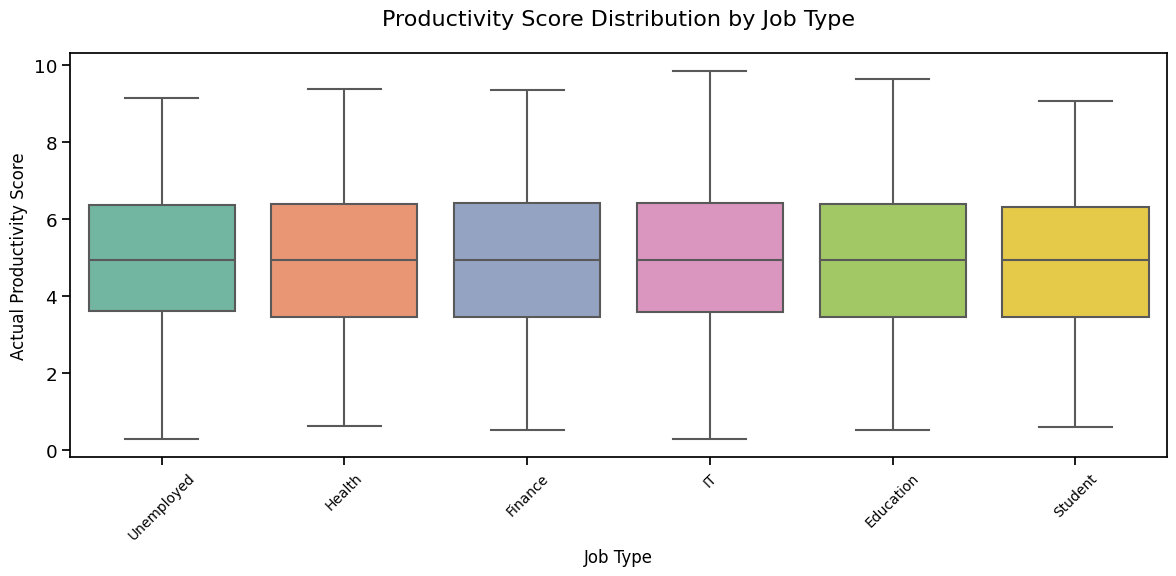

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df,x='job_type',y='actual_productivity_score',palette="Set2",linewidth=1.5,fliersize=3,)
plt.title('Productivity Score Distribution by Job Type', fontsize=16, pad=20)
plt.xlabel('Job Type', fontsize=12)
plt.ylabel('Actual Productivity Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

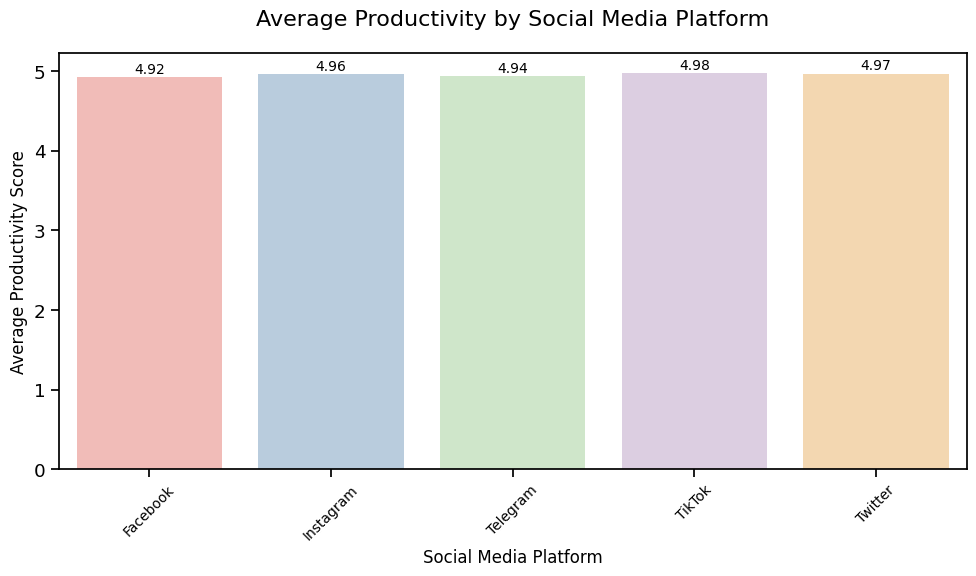

In [ ]:
plt.figure(figsize=(10, 6))
avg_productivity = df.groupby('social_platform_preference')['actual_productivity_score'].mean().reset_index()
sns.barplot(data=avg_productivity,x='social_platform_preference',y='actual_productivity_score',palette="Pastel1",)
plt.title('Average Productivity by Social Media Platform', fontsize=16, pad=20)
plt.xlabel('Social Media Platform', fontsize=12)
plt.ylabel('Average Productivity Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
for i, v in enumerate(avg_productivity['actual_productivity_score']):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

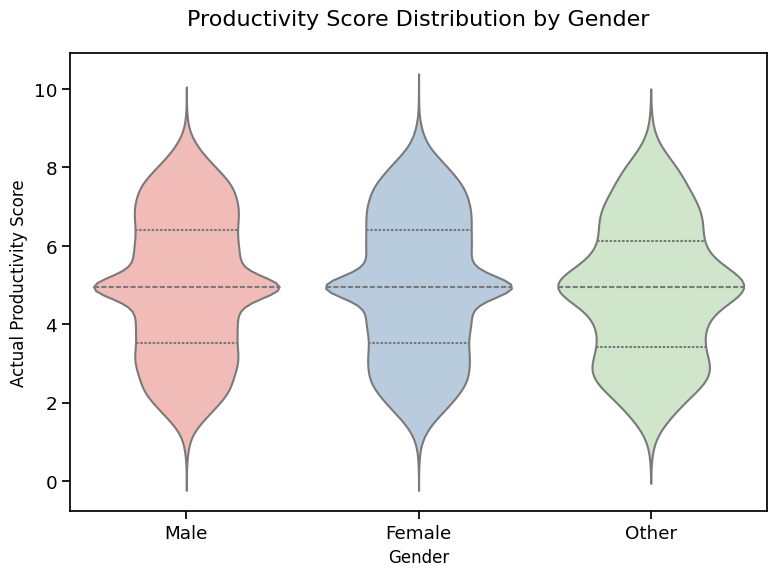

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df,x='gender',y='actual_productivity_score',palette="Pastel1",inner='quartile',linewidth=1.5,)
plt.title('Productivity Score Distribution by Gender', fontsize=16, pad=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Actual Productivity Score', fontsize=12)
plt.tight_layout()
plt.show()

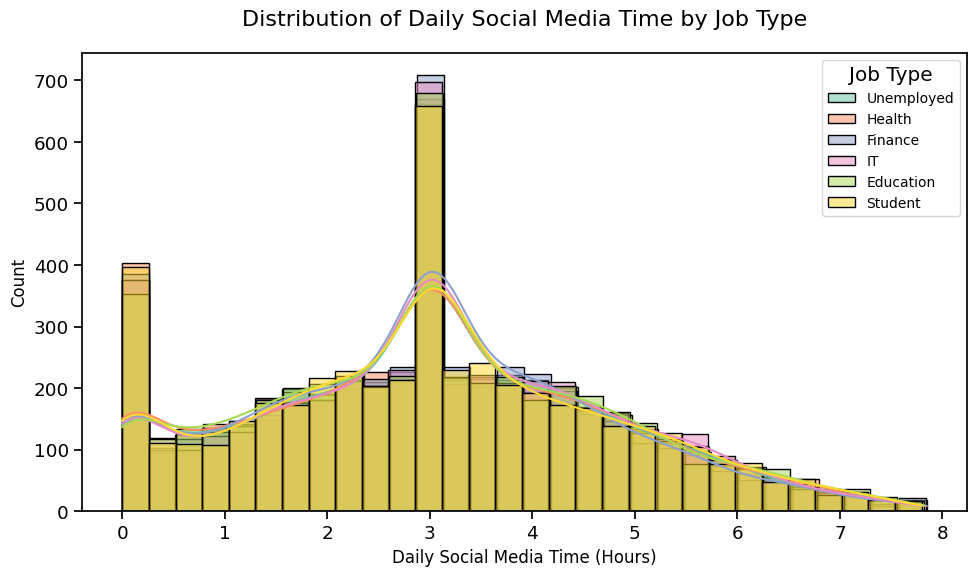

In [ ]:
plt.figure(figsize=(10, 6))
for job in df['job_type'].unique():
    sns.histplot(data=df[df['job_type'] == job],x='daily_social_media_time',label=job,kde=True,alpha=0.5,bins=30,)
plt.title('Distribution of Daily Social Media Time by Job Type', fontsize=16, pad=20)
plt.xlabel('Daily Social Media Time (Hours)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Job Type', fontsize=10)
plt.tight_layout()
plt.show()

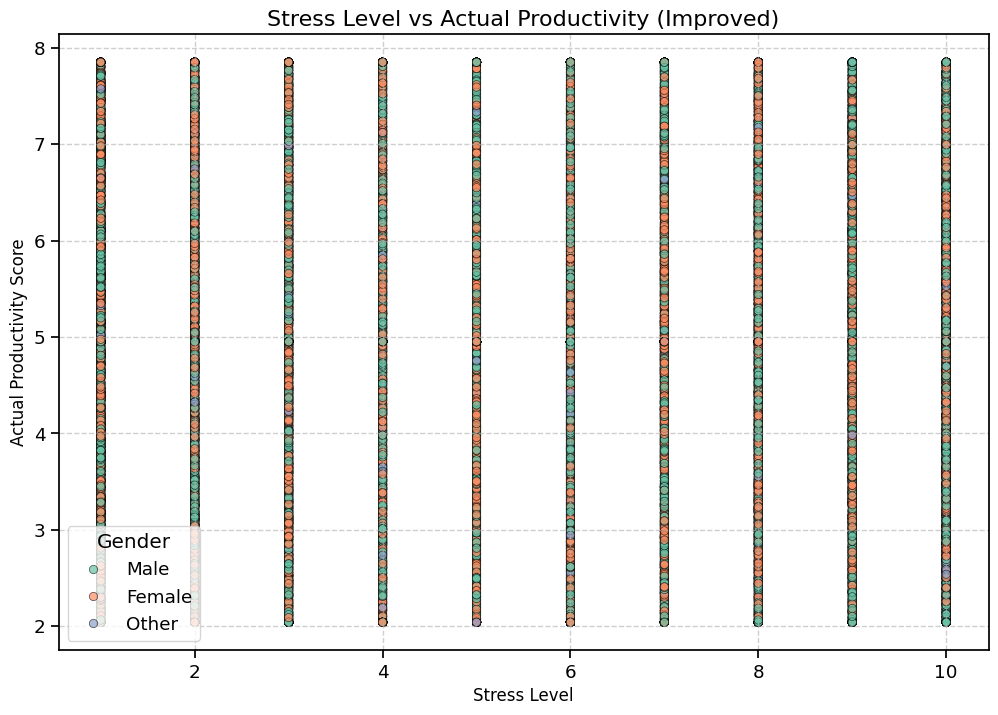

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='stress_level', y='actual_productivity_score', hue='gender', data=df, alpha=0.7, edgecolor='black')

# Add grid and styling
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("Stress Level vs Actual Productivity (Improved)", fontsize=16)
plt.xlabel("Stress Level", fontsize=12)
plt.ylabel("Actual Productivity Score", fontsize=12)
plt.legend(title='Gender')
plt.show()

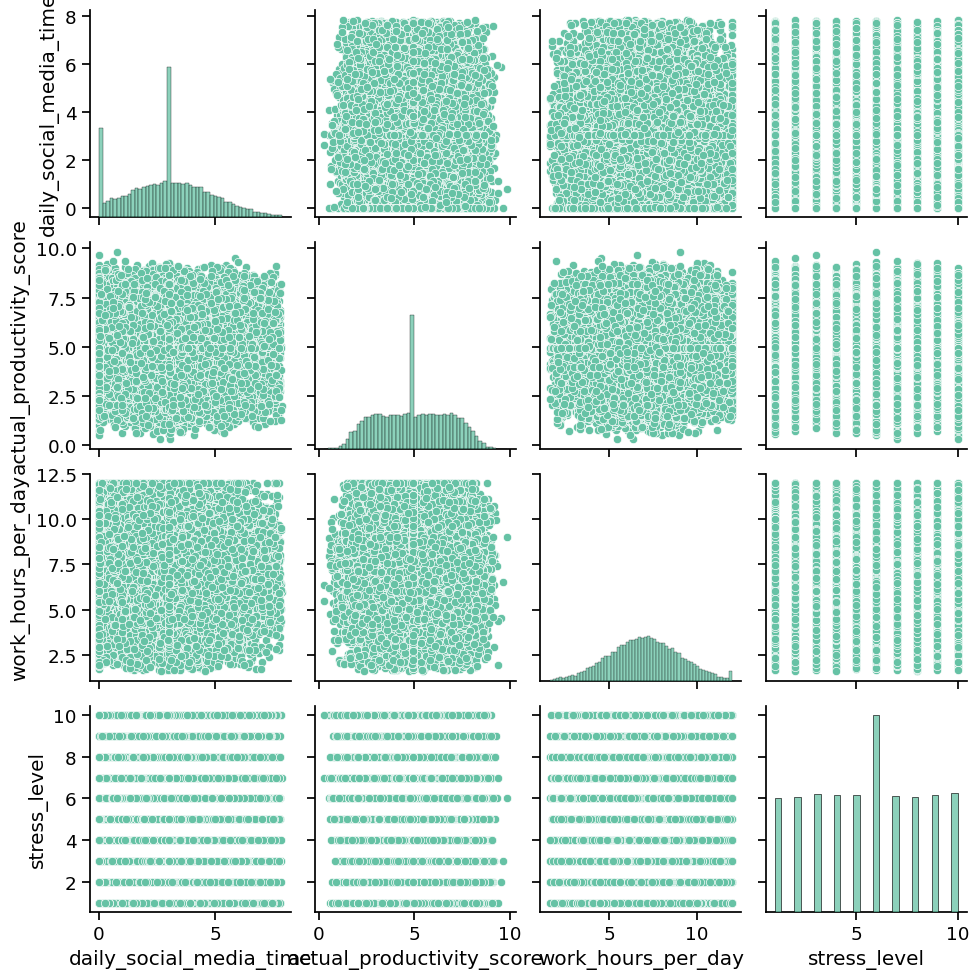

In [ ]:
key_vars = ['daily_social_media_time', 'actual_productivity_score', 'work_hours_per_day', 'stress_level']
sns.pairplot(df[key_vars])
plt.show()

**Insights**
- More time on social media (e.g., 4+ hours daily) lowers productivity scores.

- Twitter and Telegram users have slightly better productivity than TikTok or Instagram users.

- Some people stay productive despite heavy social media use, depending on their job or habits.
- IT and Finance workers have higher productivity than Students or Unemployed people.

- Students and Unemployed show big differences in productivity due to less structured days.

- Longer work hours (8–10 hours) improve productivity but can raise stress.

- High stress lowers productivity, especially for Health and Education workers.

- Sleeping 6–8 hours per night leads to better productivity; too little (<4) or too much (>10) sleep hurts it.

- High stress plus low sleep is linked to very low productivity, especially in IT and Finance.

- Men and women have similar productivity, but men show a wider range (some very high, some very low).

- Women in Education and Health report higher stress, which may affect productivity.


**Recommendations**
- Limit social media to 2–3 hours daily to stay productive.

- Use Twitter or Telegram for work-related stuff instead of TikTok or Instagram.

- Turn off unnecessary notifications to avoid distractions.
- Students and Unemployed: Follow a daily schedule using tools like timers to stay focused.

- IT/Finance/Health workers: Work 8–10 hours max and take breaks to avoid stress.

- Use focus apps (e.g., Forest) or phone settings to block distractions.


